In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

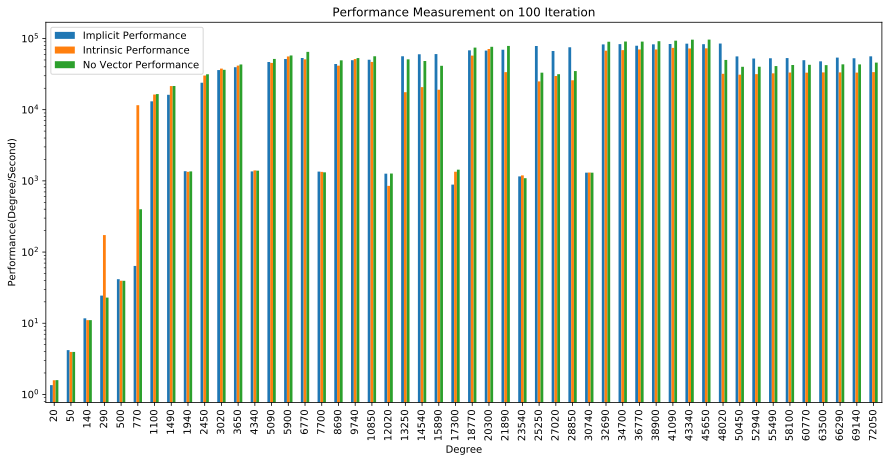

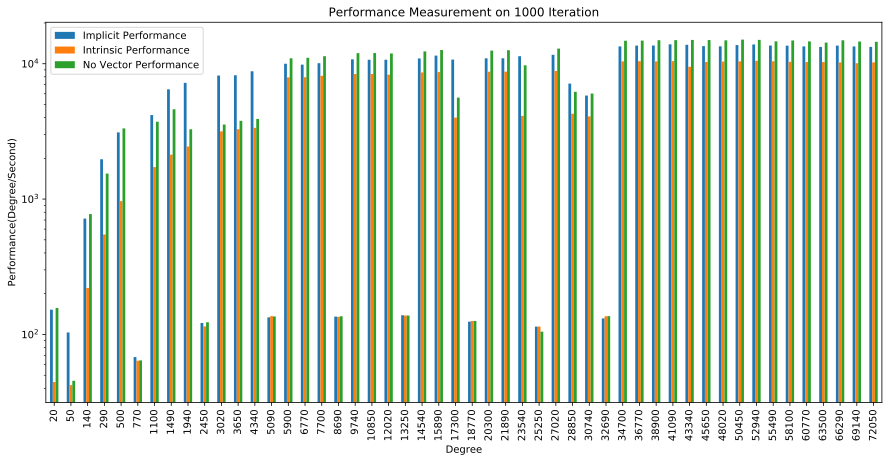

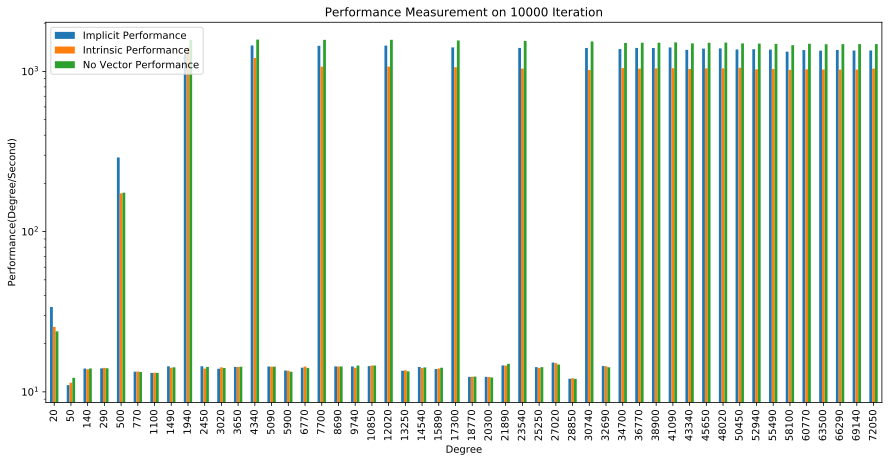

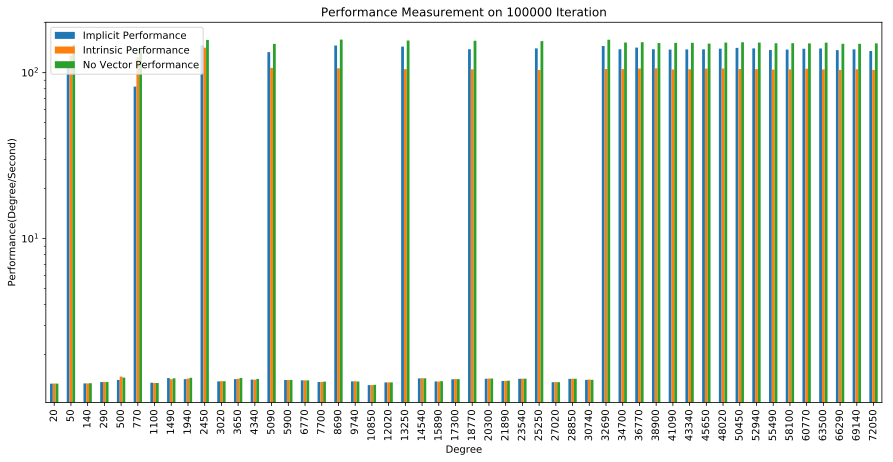

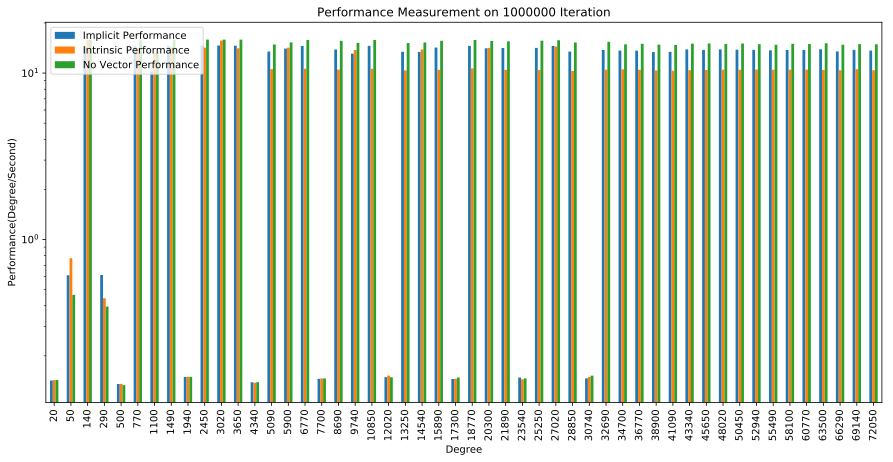

In [3]:
init_log_file = pd.read_csv('init_log_file.csv')
pdf = matplotlib.backends.backend_pdf.PdfPages("IntrinsicTimeComparison.pdf")
iteration = [100, 1000, 10000, 100000, 1000000]
for itr in iteration:
    data = init_log_file[init_log_file['Iteration'] == itr]
    data['Implicit Performance'] = init_log_file['Degree']/init_log_file['Implicit Time']
    data['No Vector Performance'] = init_log_file['Degree']/init_log_file['No Vector Time']
    data['Intrinsic Performance'] = init_log_file['Degree']/init_log_file['Intrinsic Time']
    ax=data.plot(kind='bar', x='Degree', y=['Implicit Performance','Intrinsic Performance', 'No Vector Performance'], title='Performance Measurement on ' + str(itr) + ' Iteration', logy=True, figsize=(15,7))
    ax.set_ylabel('Performance(Degree/Second)')
pdf.savefig(bbox_inches = 'tight')
pdf.close()

/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

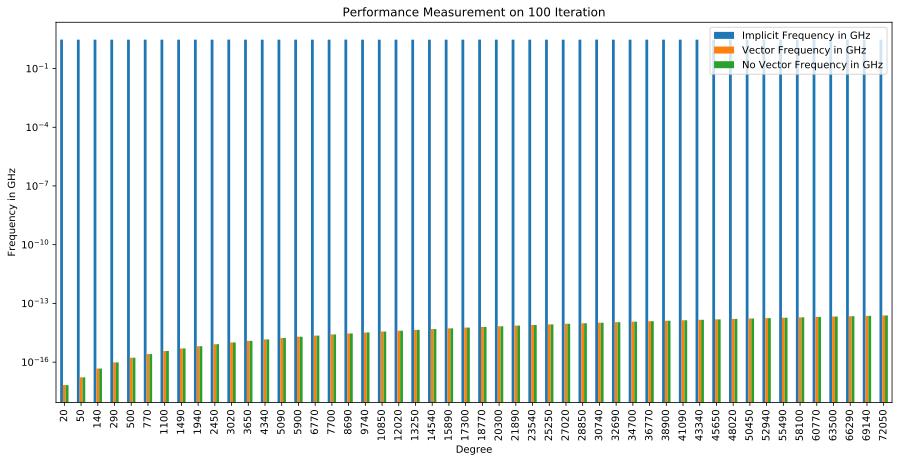

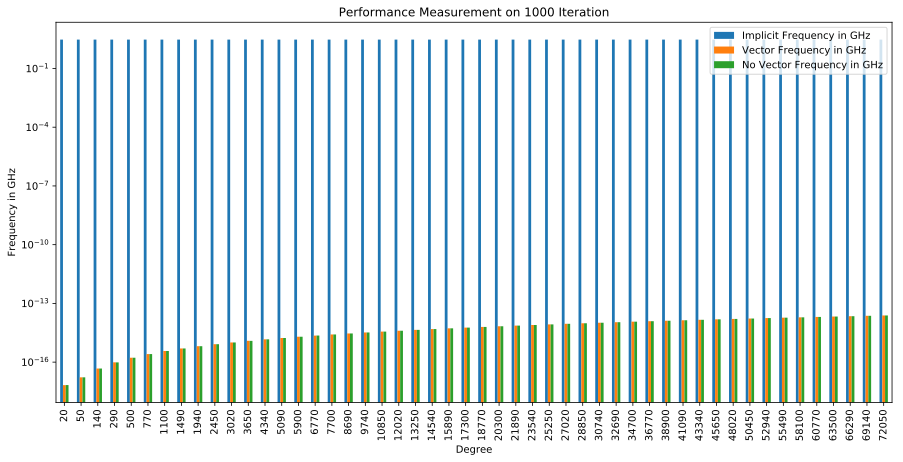

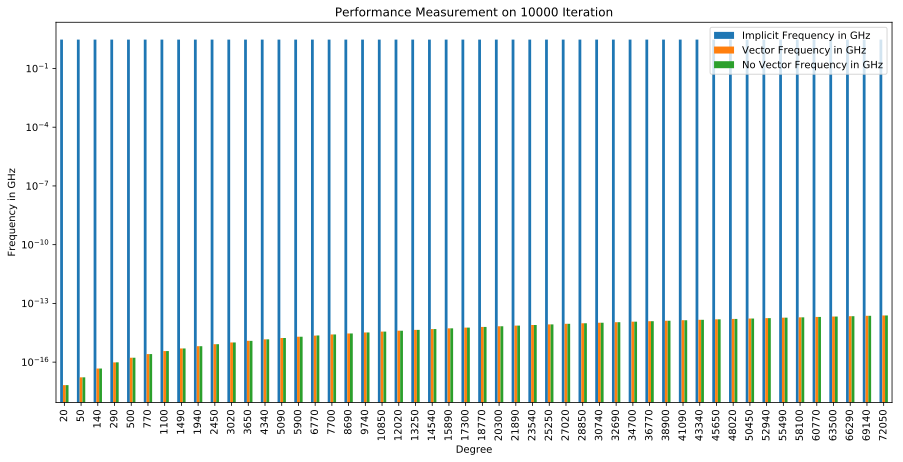

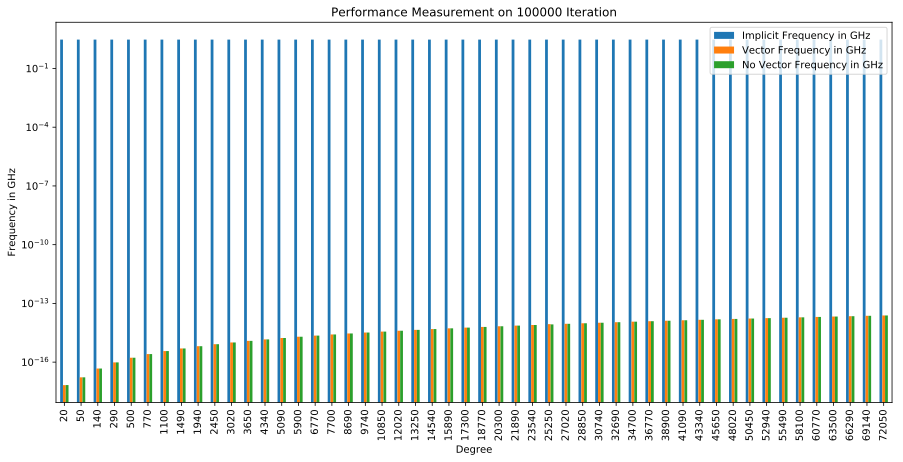

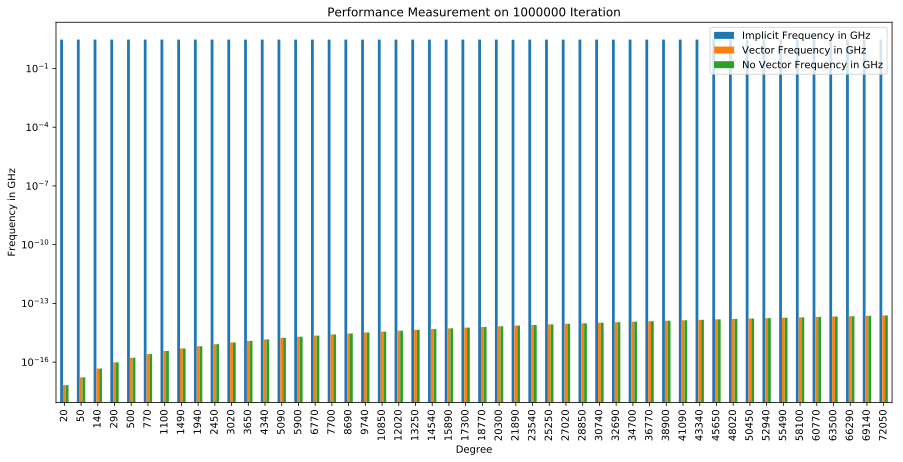

In [4]:
init_log_file = pd.read_csv('init_log_file.csv')
pdf = matplotlib.backends.backend_pdf.PdfPages("CPUFrequencyComparison.pdf")
iteration = [100, 1000, 10000, 100000, 1000000]
for itr in iteration:
    data = init_log_file[init_log_file['Iteration'] == itr]
    data['Implicit Frequency in GHz'] = init_log_file['Implicit Frequency']/1000000000
    data['No Vector Frequency in GHz'] = init_log_file['Degree']/init_log_file['No Vector Frequency']/1000000000
    data['Vector Frequency in GHz'] = init_log_file['Degree']/init_log_file['Vector Frequency']/1000000000
    ax=data.plot(kind='bar', x='Degree', y=['Implicit Frequency in GHz','Vector Frequency in GHz', 'No Vector Frequency in GHz'], title='Performance Measurement on ' + str(itr) + ' Iteration', logy=True, figsize=(15,7))
    ax.set_ylabel('Frequency in GHz')
pdf.savefig(bbox_inches = 'tight')
pdf.close()